In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("data/BATADAL_dataset03.csv")
valid_data = pd.read_csv("data/BATADAL_dataset04.csv")
test_data = pd.read_csv("data/BATADAL_test_dataset.csv")

In [10]:
train_data["DATETIME"] = pd.to_datetime(train_data.DATETIME)
valid_data["DATETIME"] = pd.to_datetime(valid_data.DATETIME)
test_data["DATETIME"] = pd.to_datetime(test_data.DATETIME)

In [24]:
# remove leading space in the columns
valid_data.columns = valid_data.columns.str.strip()

In [28]:
def slide_dataset(data: np.array, window_size: int, stride: int = 1) -> np.array:
    """
    Takes Nx1 dimensional data in form of a numpy array and
    creates data by sampling in a window_size W and stride S.
    Returns a (N - W)/S x W dimensional data
    """
    N = data.shape[0]
    num_samples = int(N - window_size / stride)
    
    # new empty numpy array to store the data with sliding window
    slid_dataset = np.empty((num_samples, window_size))

    # loop over the data and sample according
    # to window size and stride
    for i in range(window_size, N, stride):
        slid_dataset[i-window_size] = data[i-window_size:i]
    
    return slid_dataset

In [29]:
window_size = 24
signal = "L_T1"
slid_train = slide_dataset(train_data[signal].to_numpy(), window_size)
slid_valid = slide_dataset(valid_data[signal].to_numpy(), window_size)
slid_test = slide_dataset(test_data[signal].to_numpy(), window_size)

In [30]:
slid_train.shape

(8737, 24)

In [31]:
X_train = slid_train[:,:23]
y_train = slid_train[:,23]

X_valid = slid_valid[:,:23]
y_valid = slid_valid[:,23]

X_test = slid_test[:,:23]
y_test = slid_test[:,23]

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf_clf = RandomForestRegressor()

In [34]:
rf_clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:
y_pred_valid = rf_clf.predict(X_valid)

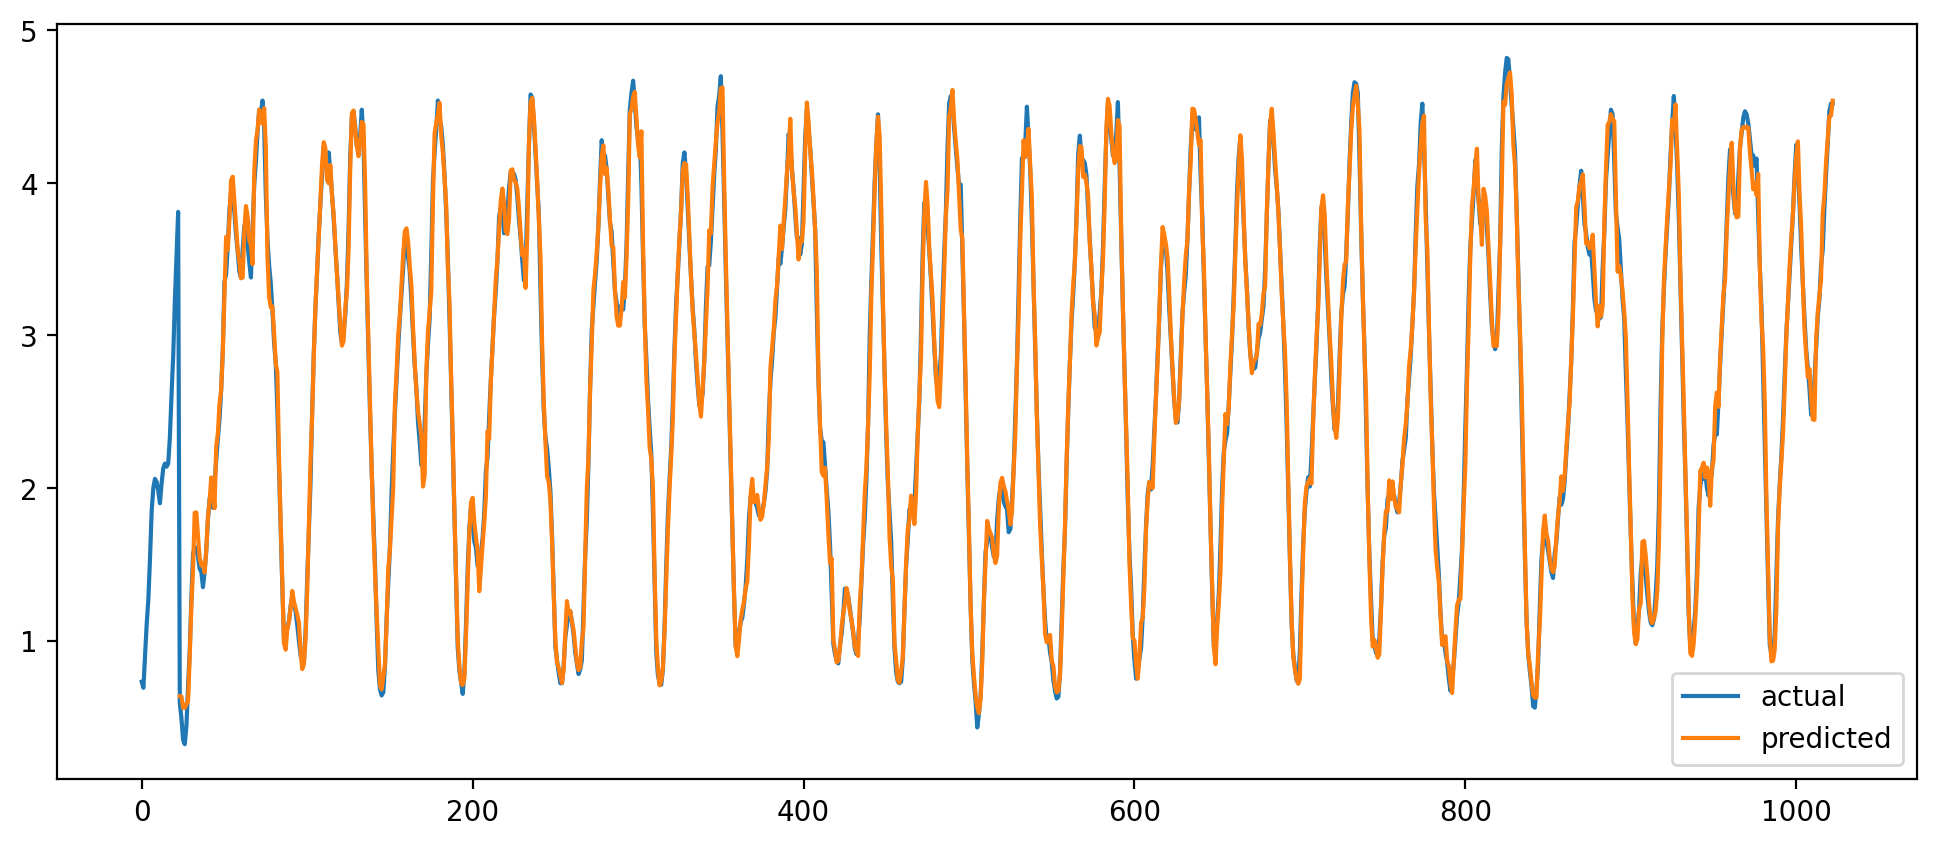

In [76]:
plt.figure(figsize=(12, 5), dpi=200)
plt.plot([i for i in range(1023)], np.concatenate((X_test[0, :], y_valid[:1000])), label="actual")
plt.plot([i for i in range(23, 1023)], y_pred_valid[:1000], label="predicted")
plt.legend()
plt.show()

---

In [62]:
y_pred_test = rf_clf.predict(X_test)

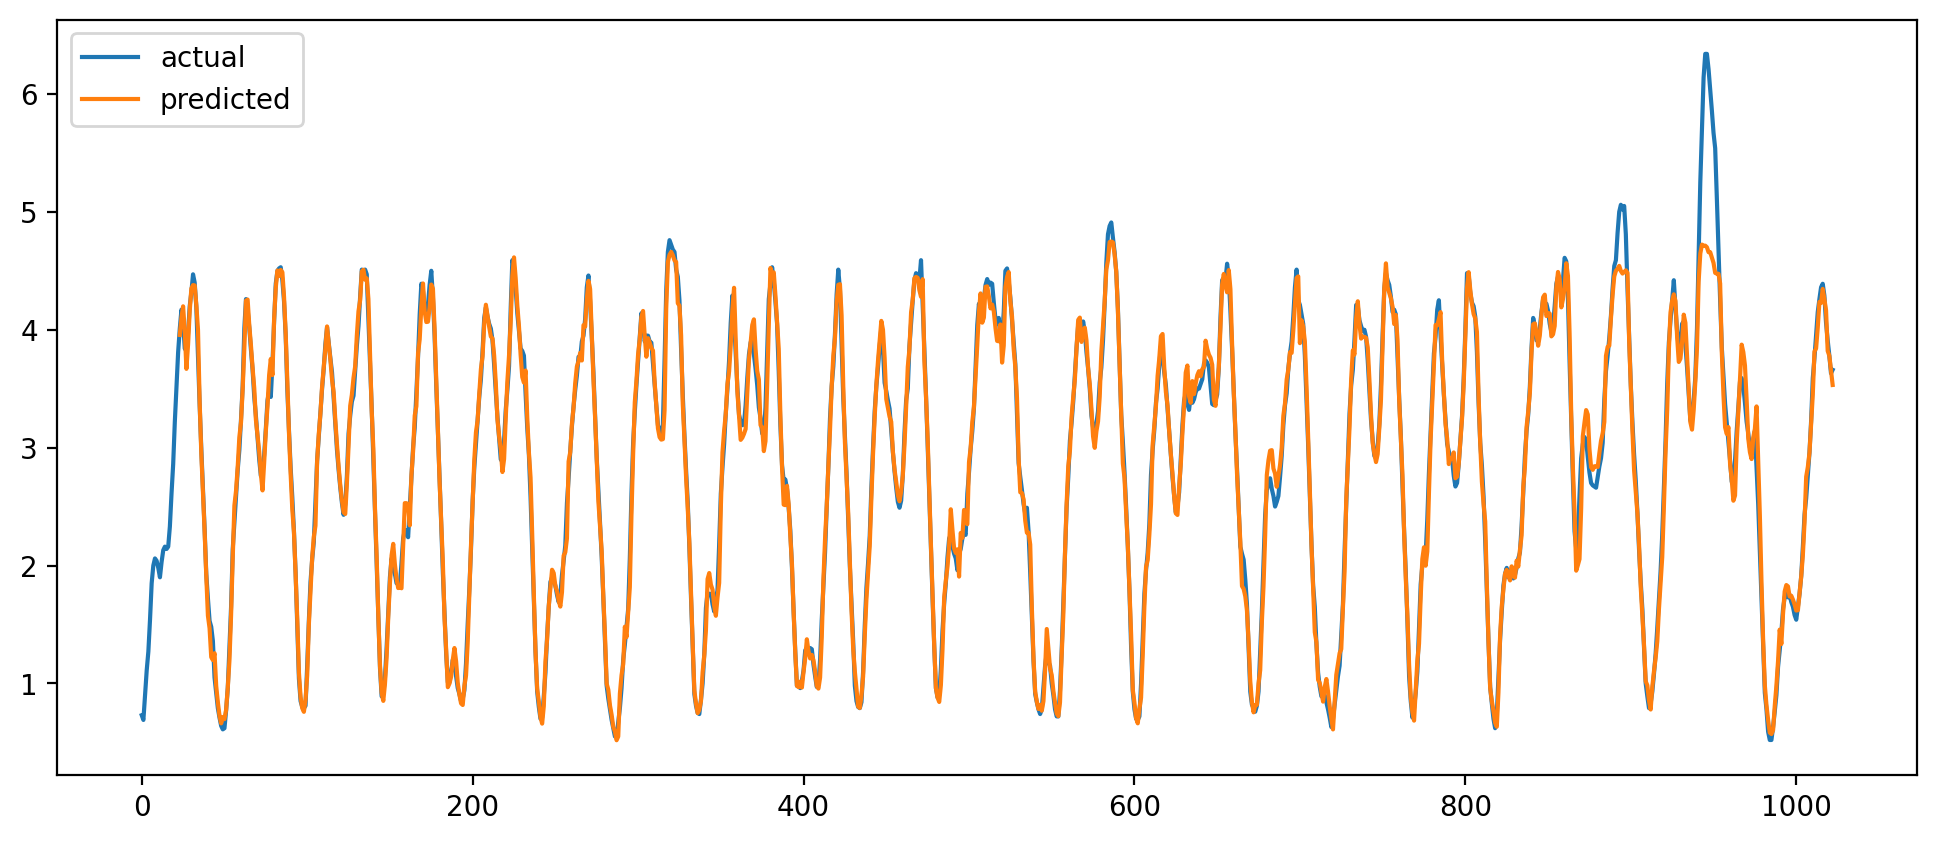

In [75]:
plt.figure(figsize=(12, 5), dpi=200)
plt.plot([i for i in range(1023)], np.concatenate((X_test[0, :], y_test[:1000])), label="actual")
plt.plot([i for i in range(23, 1023)], y_pred_test[:1000], label="predicted")
plt.legend()
plt.show()